In [17]:
import pandas as pd
import seaborn as sns

In [18]:
rosette_df = pd.read_csv('../data/rosetteArea.csv')
for col in rosette_df.columns:
    print(col)

Date
Plant
Rosette area (cm2)
Scale reference
pixels/cm
min. luminosity
max. luminosity
min. green-red
max. green-red
min. blue-yellow
max. blue-yello
min. size (cm2)
Include holes?
End date of stratification
Days after stratification


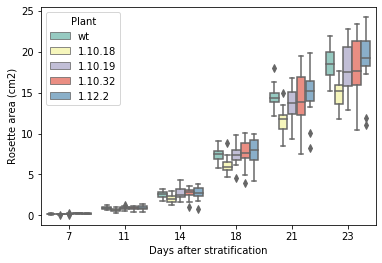

In [20]:
ax = sns.boxplot(x='Days after stratification', y='Rosette area (cm2)', data=rosette_df, hue=rosette_df['Plant'], palette="Set3")